In [ ]:
import numpy as np
import xarray as xr
import geopandas as gp
# pull from f2f 

In [25]:
!conda list

# packages in environment at /work/albertl_uri_edu/.conda/envs/f2f_2:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                  2_kmp_llvm    conda-forge
affine                    2.4.0                    pypi_0    pypi
arrow                     1.2.3                    pypi_0    pypi
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     22.1.0                   pypi_0    pypi
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1                   pypi_0    pypi
blas                      1.0                         mkl  
bottleneck                1.3.5           py310ha9d4c09_0  
brotli                    1.0.9                h166bdaf_8    conda-forge
brotli-bin                1.0.9                h166bdaf_8    conda-forge
brotlipy                  0.7.0           py310h7f8727e_1002  
bz

In [42]:
# script is from f2f/scripts/4_nldas_clip_ct. going to modify.

# import glob
# import numpy as np
# import xarray as xr
# from shapely.geometry import mapping
# import geopandas

# x = glob.glob('summed/*.nc')
# print(len(x))

# def clip2(raster,basin):
#     rast = xr.open_dataset(raster,decode_coords="all")
#     rast.rio.write_crs(4326,inplace=True)
#     rast.rio.set_spatial_dims(x_dim="lon",y_dim="lat")
#     r_clip = rast.rio.clip(basin.geometry.apply(mapping),basin.crs)
# #     plt.imshow(np.where(r_clip[0]<0,np.nan,r_clip[0]))
#     r_clip.to_netcdf(f'clipped__ct/{raster[7:32]}_ct_clipped.nc')
#     return r_clip

# # raster = x[0] #selected first 

# basin = geopandas.read_file('/work/albertl_uri_edu/fluxtoflow/smap__part1__archived/connecticut/ct_shp/wbd_ctriver.shp')


# for i in x:
#     clip2(i,basin)



import glob
import re
import numpy as np
import xarray as xr
from shapely.geometry import mapping
import geopandas
import rioxarray
import sys
import os, sys

logfile = '../data/GLDAS/clipped/columbia/_log.txt'
globfile = '../data/GLDAS/raw/*.nc4'
shapefile = '/work/albertl_uri_edu/f2f_holistic/data/shapes/columbia/Columbia_Basin_Watershed_Boundary.shp'

def clip2(raster,basin):
        rast = xr.open_dataset(raster,decode_coords="all")
        rast.rio.write_crs(4326,inplace=True)
        rast.rio.set_spatial_dims(x_dim="lon",y_dim="lat")
        r_clip = rast.rio.clip(basin.geometry.apply(mapping),basin.crs)
        y = re.findall('\d{6}',raster)
    #     plt.imshow(np.where(r_clip[0]<0,np.nan,r_clip[0]))
        r_clip.to_netcdf(f"../data/GLDAS/clipped/columbia/{y[0]}_clipped.nc")
        return r_clip

class HiddenPrints: #thanks stackoverflow https://stackoverflow.com/questions/8391411/how-to-block-calls-to-print
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(logfile, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout
        
with HiddenPrints():
    x = glob.glob(globfile)
    print(len(x))
    basin = geopandas.read_file(shapefile)

    for idx,i in enumerate(x):
        clip2(i,basin)
        # if idx == 0:
        #     break

In [15]:
y = re.findall('\d{6}',x[0])[0]
y

'200001'

In [36]:
z = xr.open_dataset('../data/GLDAS/clipped/columbia/200001_clipped.nc')
z

<xarray.Dataset>
Dimensions:                (time: 1, lon: 57, lat: 46)
Coordinates:
  * time                   (time) datetime64[ns] 2000-01-01
  * lon                    (lon) float32 -123.9 -123.6 -123.4 ... -110.1 -109.9
  * lat                    (lat) float32 41.38 41.62 41.88 ... 52.12 52.38 52.62
Data variables: (12/37)
    spatial_ref            int64 ...
    Swnet_tavg             (time, lat, lon) float32 ...
    Lwnet_tavg             (time, lat, lon) float32 ...
    Qle_tavg               (time, lat, lon) float32 ...
    Qh_tavg                (time, lat, lon) float32 ...
    Qg_tavg                (time, lat, lon) float32 ...
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 ...
    Tair_f_inst            (time, lat, lon) float32 ...
    Qair_f_inst            (time, lat, lon) float32 ...
    Psurf_f_inst           (time, lat, lon) float32 ...
    SWdown_f_tavg          (time, lat, lon) float32 ...
    LWdown_f_tavg          (time, lat, lon) float32 ...
Attributes: (12/19)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2019-09-17T14:58:21.836
    source:                 Noah_v3.6 forced with GDAS-AGRMET-GPCPv13rA1
    institution:            NASA GSFC
    missing_value:          -9999.0
    ...                     ...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

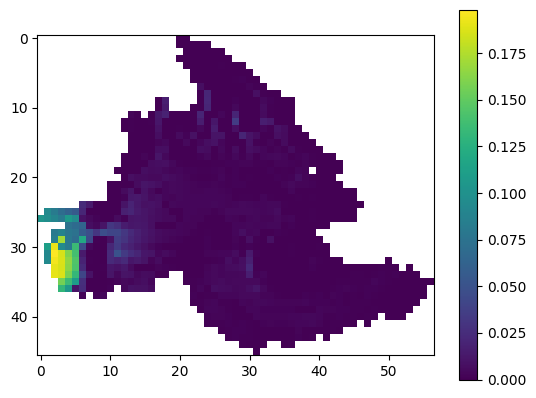

In [55]:
import matplotlib.pyplot as plt
plt.imshow(np.flipud(z.Qs_acc[0]))
plt.colorbar()

In [45]:
z1 = xr.open_dataset('../data/GLDAS/clipped/yukon/200001_clipped.nc')
z1

<xarray.Dataset>
Dimensions:                (time: 1, lon: 143, lat: 38)
Coordinates:
  * time                   (time) datetime64[ns] 2000-01-01
  * lon                    (lon) float32 -166.1 -165.9 -165.6 ... -130.9 -130.6
  * lat                    (lat) float32 59.62 59.88 60.12 ... 68.38 68.62 68.88
Data variables: (12/37)
    spatial_ref            int64 ...
    Swnet_tavg             (time, lat, lon) float32 ...
    Lwnet_tavg             (time, lat, lon) float32 ...
    Qle_tavg               (time, lat, lon) float32 ...
    Qh_tavg                (time, lat, lon) float32 ...
    Qg_tavg                (time, lat, lon) float32 ...
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 ...
    Tair_f_inst            (time, lat, lon) float32 ...
    Qair_f_inst            (time, lat, lon) float32 ...
    Psurf_f_inst           (time, lat, lon) float32 ...
    SWdown_f_tavg          (time, lat, lon) float32 ...
    LWdown_f_tavg          (time, lat, lon) float32 ...
Attributes: (12/19)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2019-09-17T14:58:21.836
    source:                 Noah_v3.6 forced with GDAS-AGRMET-GPCPv13rA1
    institution:            NASA GSFC
    missing_value:          -9999.0
    ...                     ...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

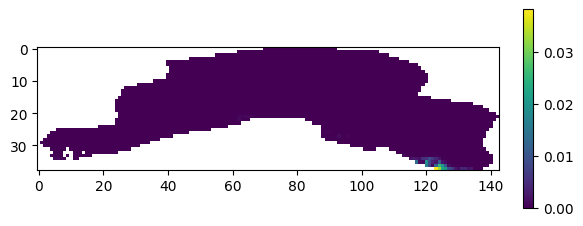

In [54]:
plt.imshow(np.flipud(z1.Qsb_acc[0]))
plt.colorbar(fraction=.02)